In [1]:
# With systematics!

In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import localSettings as ls
from load_data_run123 import *
from unblinding_far_sideband import *
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import seaborn as sns
from ccncpi0_analysis import ccncpi0_analysis
from sys_functions import *

In [3]:
# ntuple_path = ls.ntuple_path+"unfiltered/"
ntuple_path = ls.ntuple_path+"twoshrs/"

In [4]:
my_ccncpi0_analysis = ccncpi0_analysis(ntuple_path)

/n/home00/nfoppiani/projects/PELEE_ccncpi0/load_data_run123.py:51: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/n/home00/nfoppiani/projects/PELEE_ccncpi0/load_data_run123.py:51: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/n/home00/nfoppiani/projects/PELEE_ccncpi0/load_data_run123.py:51: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/n/home00/nfoppiani/projects/PELEE_ccncpi0/load_data_run123.py:51: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/n/home00/nfoppiani/projects/PELEE_ccncpi0/load_data_run123.py:51: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(2*e1*e2*(1-px1*px2-py1*py2-pz1*pz2))
/n/home00/nfoppiani/projects/PELEE_ccncpi0/load_data_run123.py:51: RuntimeWarning: overflow encountered in float_scalars
  return np.sqrt

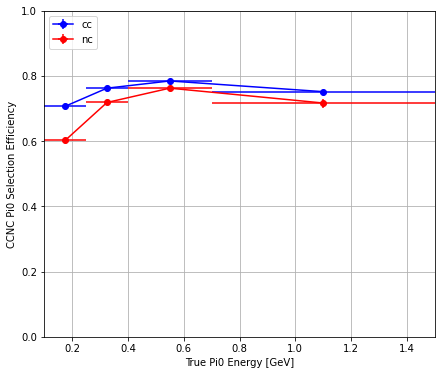

{'ccnc==0': array([[0.70671959, 0.76228357, 0.78439264, 0.75155386]]),
 'ccnc==1': array([[0.60199557, 0.71840826, 0.76229205, 0.71673004]])}

In [10]:
# Efficiency plot
my_ccncpi0_analysis.efficiency_plot(variable='pi0_e', bin_edges=[0.1, 0.25, 0.4, 0.7, 1.5])

In [53]:
# this is a function which gives as output [num_CC, den_CC, eff_CC, num_NC, den_NC, eff_NC, eff_NC/eff_CC]
# we are going to give it as an argument to sampleSystematics in the following cell
Eff_ccnc(my_ccncpi0_analysis.pi0s, 
                          weights=my_ccncpi0_analysis.pi0s["weightSplineTimesTune"], 
                          var='pi0_e',
                          num_query=my_ccncpi0_analysis.CCNCSEL, 
                          den_query=my_ccncpi0_analysis.ACCEPTANCE, 
                          bin_edges=[0.1, 1.5], #only one bin, overall efficiency
                          num_dem=True)

array([[4.63042315e+04, 6.17727407e+04, 7.49590045e-01, 1.34090000e+04,
        1.93600000e+04, 6.92613636e-01, 9.23989908e-01]])

In [55]:
cv, variations = sampleSystematics(my_ccncpi0_analysis.pi0s, 
                  Eff_ccnc, 
                  var_weight_sys="weightsGenie", 
                  var_weight_cv='weightSplineTimesTune', 
                  n_max_universes=None, 
                  var='pi0_e',
                  num_query=my_ccncpi0_analysis.CCNCSEL, 
                  den_query=my_ccncpi0_analysis.ACCEPTANCE, 
                  bin_edges=[0.1, 1.5],
                  num_dem=True)
delta_eff = (variations-cv)
# I build the dataset without subtracting the CV, it's a matter of taste in the plot
eff_df = pd.DataFrame((variations), columns=['Num CC', 'Den CC', 'Eff CC', 'Num NC', 'Den NC', 'Eff NC', 'Eff ratio'])

weights_cv shape = (83945,)
cv shape = (1, 7)
weights_sys shape = (500, 83945)
sys_variations shape = (500, 7)


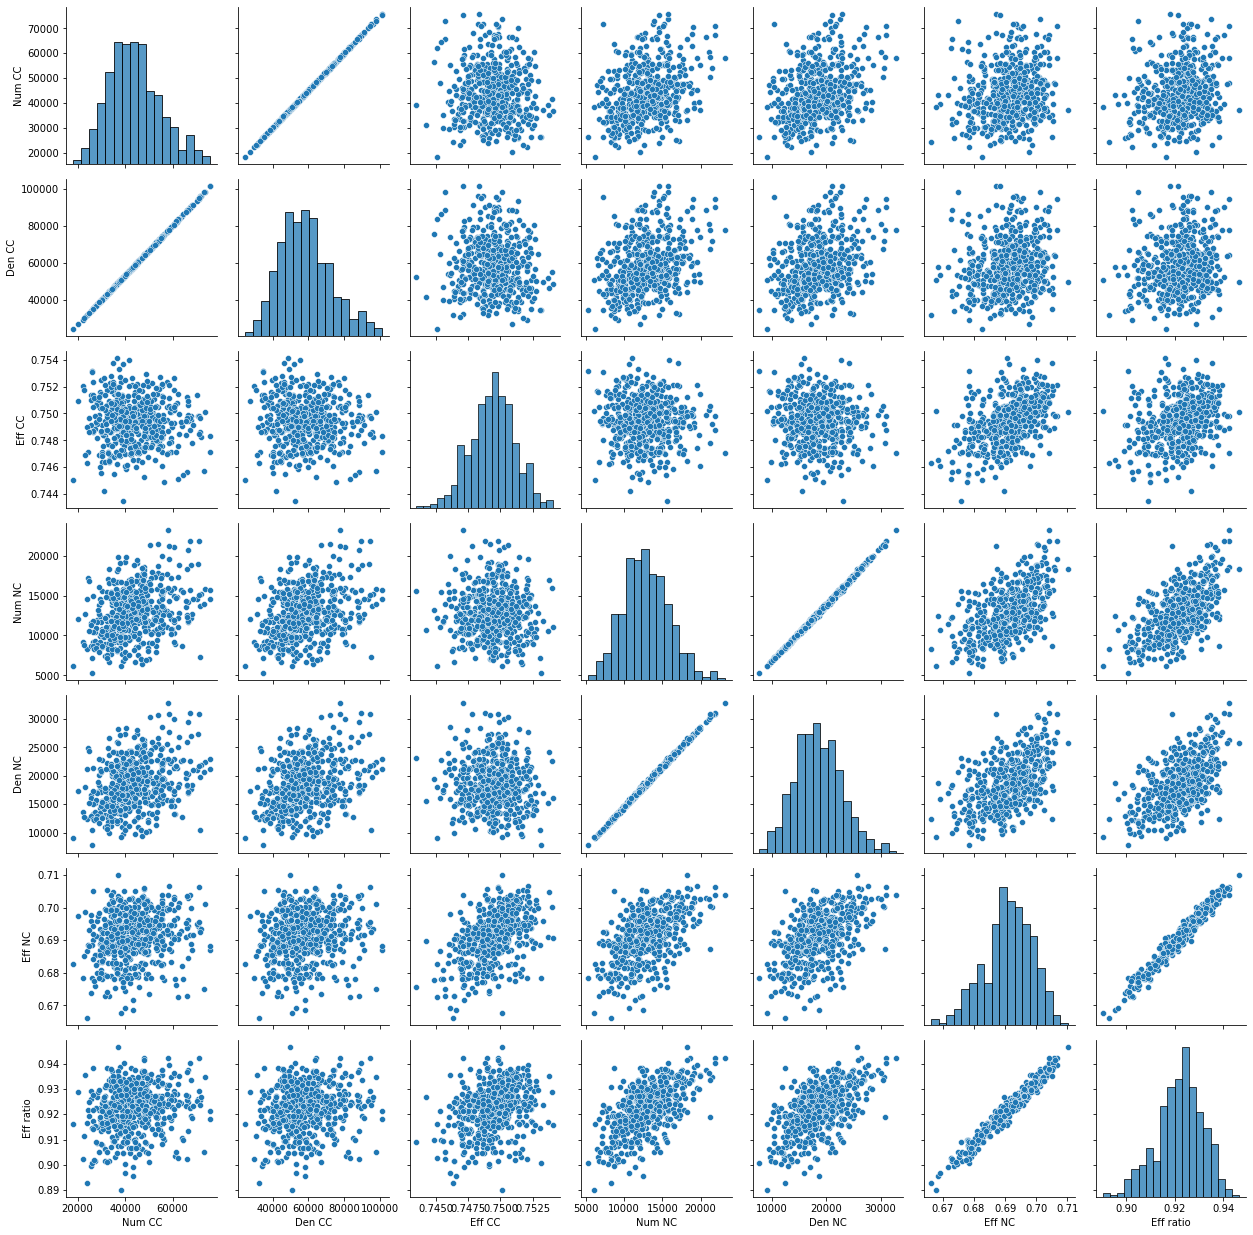

In [56]:
# More info here -> https://seaborn.pydata.org/tutorial/axis_grids.html
g = sns.PairGrid(eff_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

In [75]:
# Covariance matrix, visualising the same function
cov = covMatrix(my_ccncpi0_analysis.pi0s, 
                  Eff_ccnc, 
                  var_weight_sys="weightsGenie", 
                  var_weight_cv='weightSplineTimesTune', 
                  n_max_universes=None, 
                  var='pi0_e',
                  num_query=my_ccncpi0_analysis.CCNCSEL, 
                  den_query=my_ccncpi0_analysis.ACCEPTANCE, 
                  bin_edges=[0.1, 1.5],
                  num_dem=True)
diag_uncertainties = np.sqrt(np.diag(cov))[:, np.newaxis]
corr = cov / (diag_uncertainties.T * diag_uncertainties)

weights_cv shape = (83945,)
cv shape = (1, 7)
weights_sys shape = (500, 83945)
sys_variations shape = (500, 7)
delta_sys shape = (500, 7, 1)
cov shape = (7, 7)


Text(0.5, 1.0, 'CC-NC$\\pi_0$ selection efficiency\ncorrelation matrix')

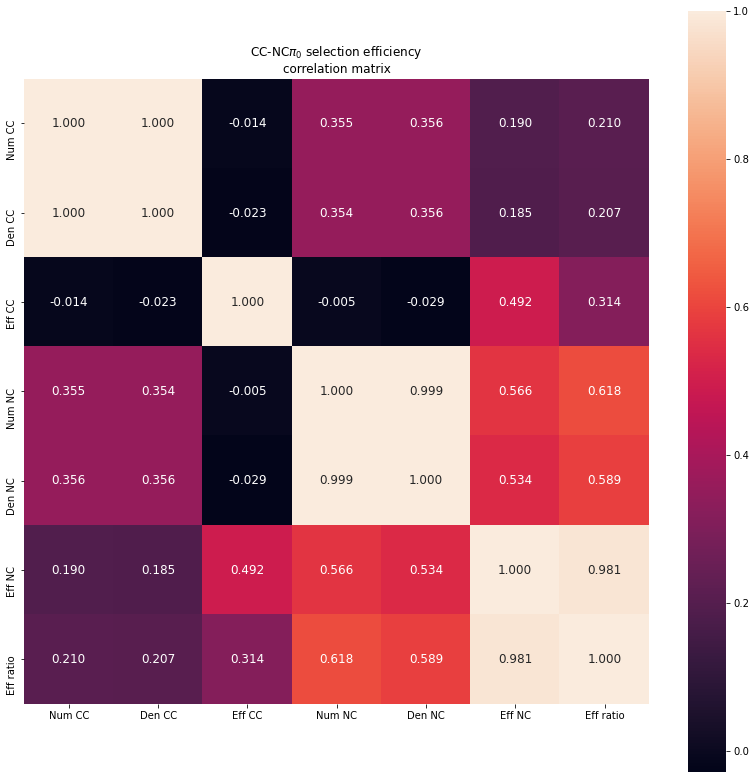

In [83]:
# Plot a correlation matrix
plt.figure(figsize=(14, 14))
hm = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.3f',
                 annot_kws={'size': 12},
                 xticklabels=['Num CC', 'Den CC', 'Eff CC', 'Num NC', 'Den NC', 'Eff NC', 'Eff ratio'],
                 yticklabels=['Num CC', 'Den CC', 'Eff CC', 'Num NC', 'Den NC', 'Eff NC', 'Eff ratio'],
                 )
plt.title('CC-NC$\pi_0$ selection efficiency\ncorrelation matrix')